# PHISHING WEBSITE DETECTION

In [15]:
#importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from scipy import stats
import math
sns.set_style(style="darkgrid")    #whitegrid
%matplotlib inline
#use this command so that plots appear inline 

In [16]:
from platform import python_version
print("python",python_version())
print('\n'.join(f'{m._name_} {m._version_}' for m in globals().values() if getattr(m,'_version_',None)))

python 3.9.0



In [17]:
phishing_legitimate = pd.read_csv("DATASET PROJECT.csv")

In [18]:
phishing_legitimate

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [19]:
phishing_legitimate = phishing_legitimate.drop("index",axis=1)

In [20]:
phishing_legitimate

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


## 1 means legitimate
## 0 is suspicious
## -1 is phishing

# EXPLORATORY DATA ANALYSIS

## Variable identifiction :
1.first identifying predictor (input) and target (output) variables

In [21]:
#lets first load the train
df_train = phishing_legitimate
df_train.head(10)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [22]:
#our target(output) variable is Result
#and remaining columns are predictors(input)
y = targgets = label =output_var = df_train["Result"]
x = predictors = input_var = df_train.loc[:,df_train.columns != "Result"]

In [23]:
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [24]:
x.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [25]:
#print the target and input variables
print("input variables", list(x.columns))
print("output variables", "['Result']")

input variables ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
output variables ['Result']


### 2.Univariate analysis:
1.explore variables one by one
2.method depends on whether the variable type is categorical(text) or    
  continuous(numeric)


In [26]:
#Identify the data type of the variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [27]:
datatype = df_train.dtypes

In [28]:
#run descriptive statistics of numerical data types
df_train.describe(include= ['float64','int64'])

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#lets analyse the target variable "Result "
#calculate the percentage of phishing websites and legitimate websites
df_train["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [30]:
percentage_pl = (df_train["Result"].value_counts()/df_train.shape[0]*100).round(2)
percentage_pl
#-1-phishing
#1-legitimate

 1    55.69
-1    44.31
Name: Result, dtype: float64

<AxesSubplot: xlabel='Result', ylabel='count'>

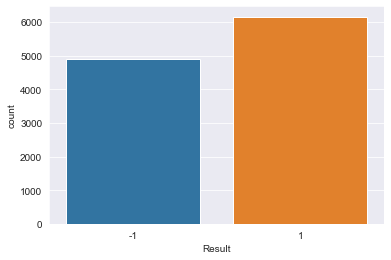

In [31]:
#lets plot the graph which are phishing and legitimate as per the column data 
sns.countplot(data=df_train,x="Result")

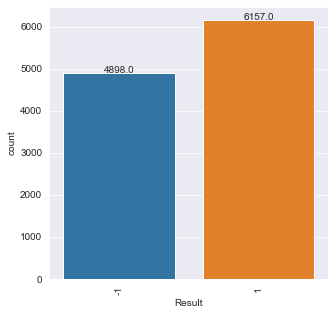

In [32]:
#lets display count on top of count plot
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x="Result", data = df_train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

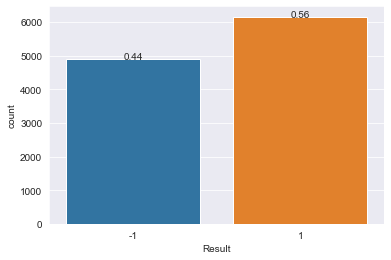

In [33]:
# If we want to display the percentage (display problem)
from matplotlib.pyplot import show
titanic = df_train
total = float(len(titanic)) # one website per row 
ax = sns.countplot(x="Result", data=titanic) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

TypeError: countplot() got multiple values for argument 'data'

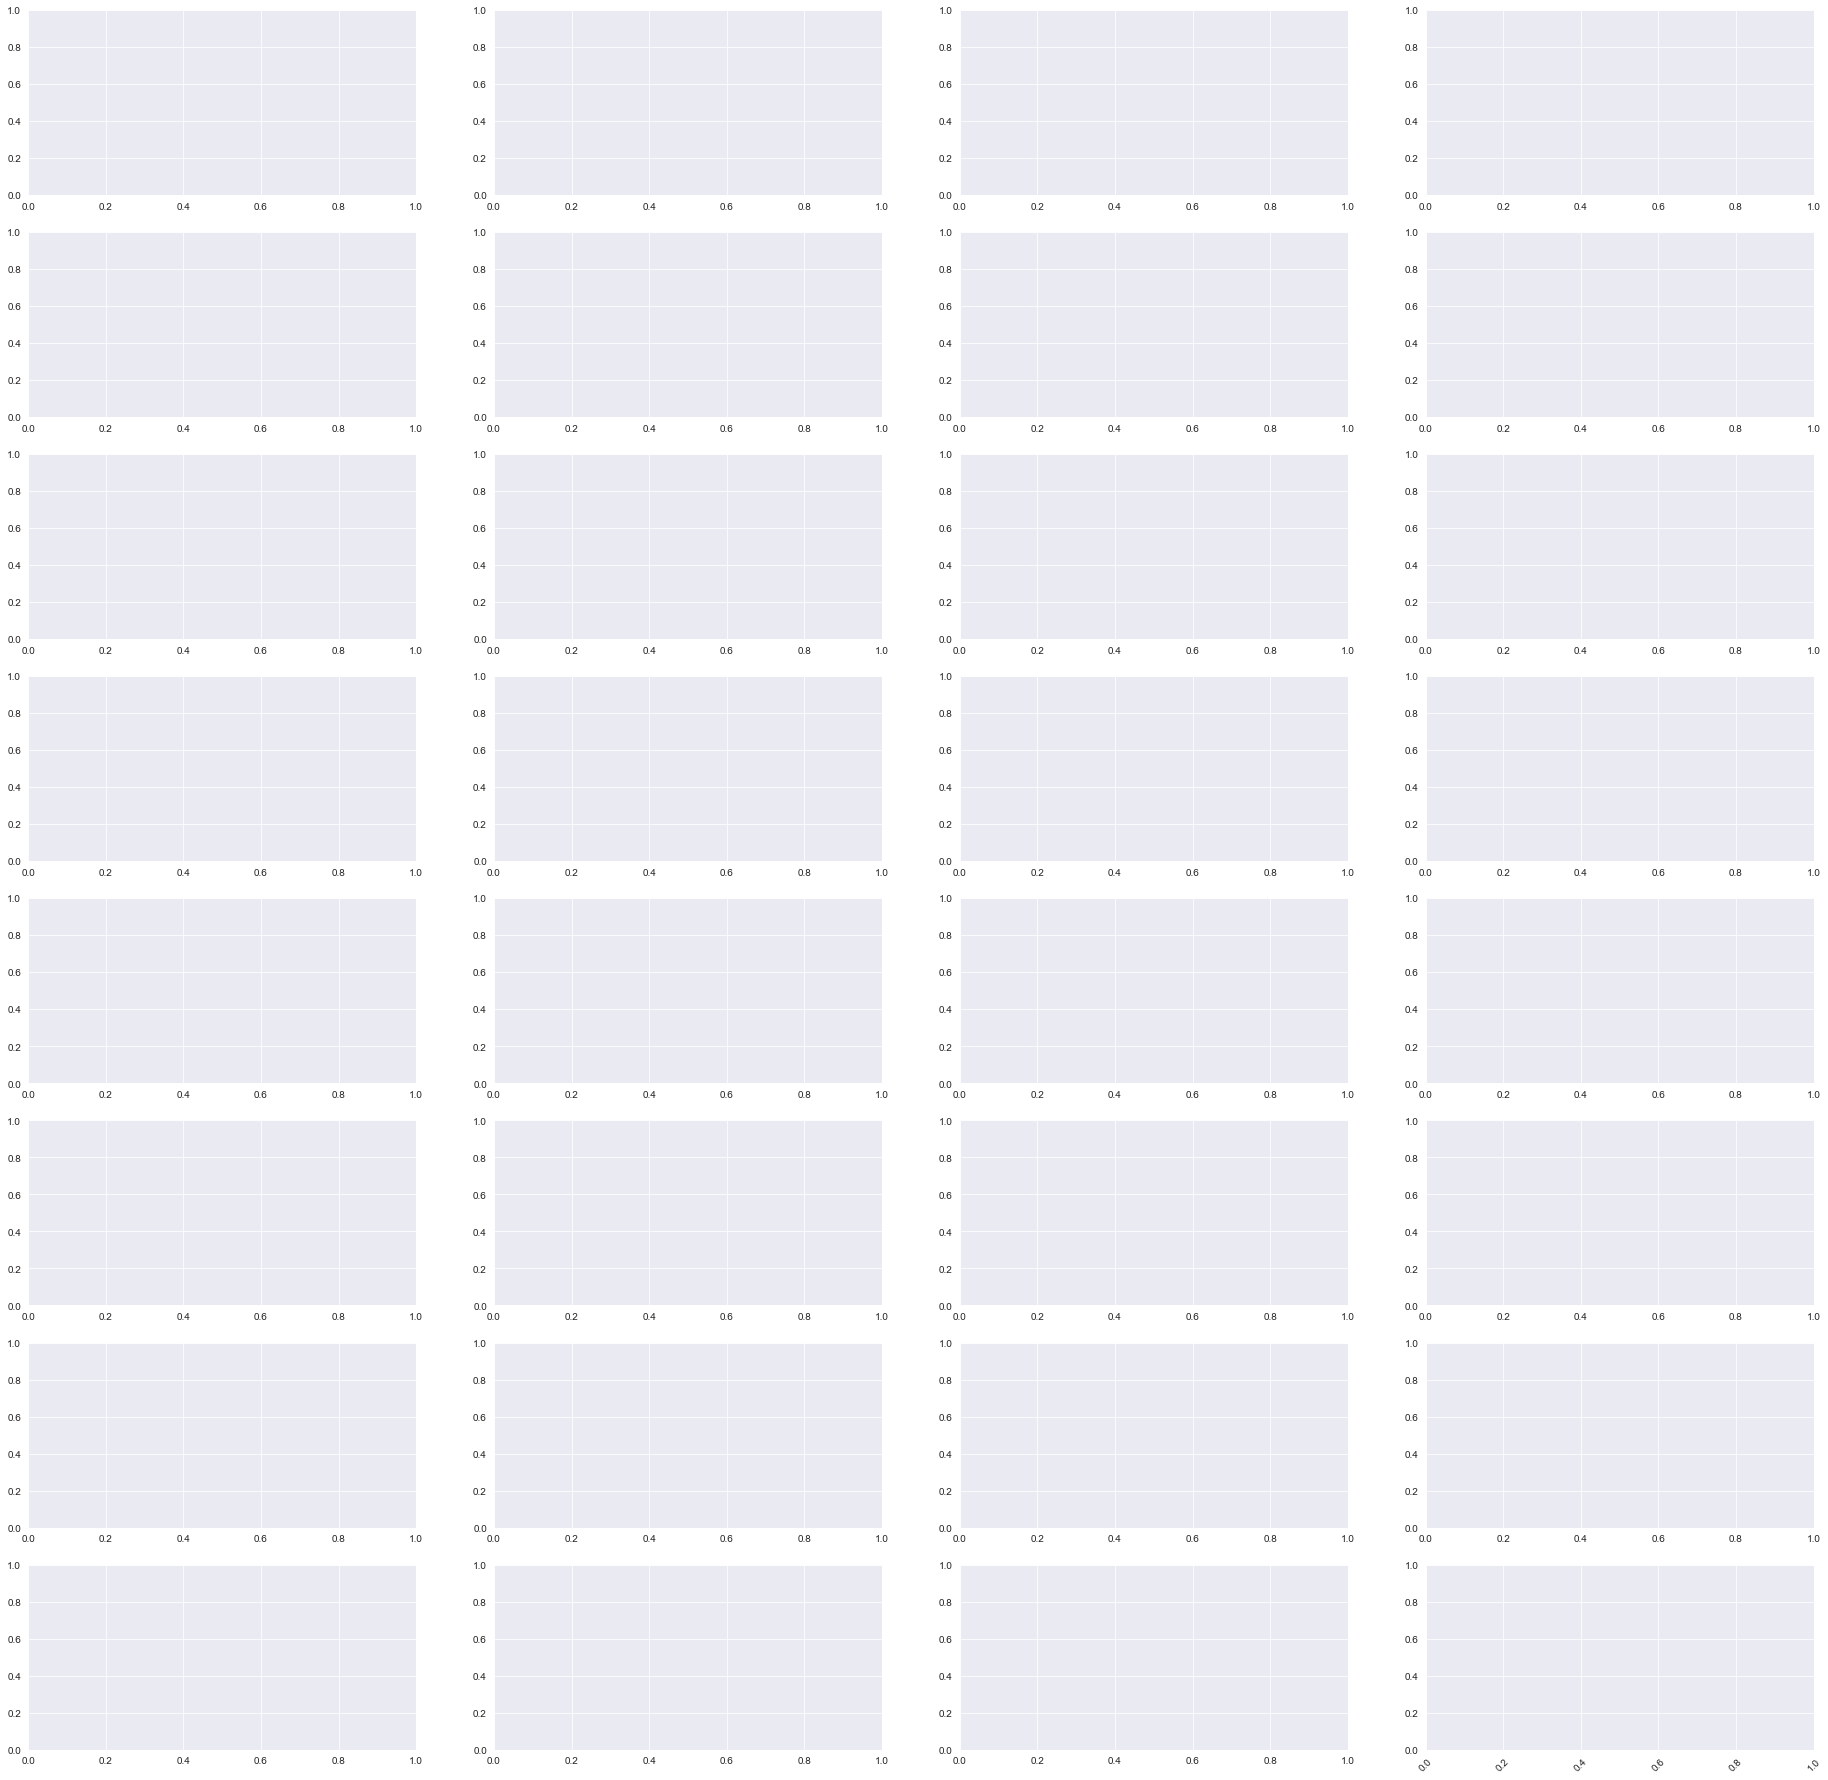

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # supress future warning
# Combined univariate analysis of each variables
fig,axes = plt.subplots(8,4, figsize=(32,32))
plt.xticks(rotation = 45)
sns.countplot('having_IPhaving_IP_Address',data=df_train,ax=axes[0,0])
sns.countplot('URLURL_Length',data=df_train,ax=axes[0,1])
sns.countplot('Shortining_Service',data=df_train,ax=axes[0,2])
sns.countplot('having_At_Symbol',data=df_train,ax=axes[0,3])
sns.countplot('double_slash_redirecting',data=df_train,ax=axes[1,0])
sns.countplot('Prefix_Suffix',data=df_train,ax=axes[1,1])
sns.countplot('having_Sub_Domain',data=df_train,ax=axes[1,2])
sns.countplot('SSLfinal_State',data=df_train,ax=axes[1,3])
sns.countplot('Domain_registeration_length',data=df_train,ax=axes[2,0])
sns.countplot('Favicon',data=df_train,ax=axes[2,1])
sns.countplot('port',data=df_train,ax=axes[2,2])
sns.countplot('HTTPS_token',data=df_train,ax=axes[2,3])
sns.countplot('Request_URL',data=df_train,ax=axes[3,0])
sns.countplot('URL_of_Anchor',data=df_train,ax=axes[3,1])
sns.countplot('Links_in_tags',data=df_train,ax=axes[3,2])
sns.countplot('SFH',data=df_train,ax=axes[3,3])
sns.countplot('Submitting_to_email',data=df_train,ax=axes[4,0])
sns.countplot('Abnormal_URL',data=df_train,ax=axes[4,1])
sns.countplot('Redirect',data=df_train,ax=axes[4,2])
sns.countplot('on_mouseover',data=df_train,ax=axes[4,3])
sns.countplot('RightClick',data=df_train,ax=axes[5,0])
sns.countplot('popUpWidnow',data=df_train,ax=axes[5,1])
sns.countplot('Iframe',data=df_train,ax=axes[5,2])
sns.countplot('age_of_domain',data=df_train,ax=axes[5,3])
sns.countplot('DNSRecord',data=df_train,ax=axes[6,0])
sns.countplot('web_traffic',data=df_train,ax=axes[6,1])
sns.countplot('Page_Rank',data=df_train,ax=axes[6,2])
sns.countplot('Google_Index',data=df_train,ax=axes[6,3])
sns.countplot('Links_pointing_to_page',data=df_train,ax=axes[7,0])
sns.countplot('Statistical_report',data=df_train,ax=axes[7,1])
sns.countplot('Result',data=df_train,ax=axes[7,2])

sns.histplot(data=df_train,x="Result",ax=axes[7,3])


## Bivariate Analysis
We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables. 
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
    Different methods are used to tackle these combinations during analysis process.

In [ ]:
sns.catplot(x='Result',hue="having_IPhaving_IP_Address",data=df_train,kind = "count",height=6, aspect=1)

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="URLURL_Length",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
g = sns.catplot(data=df_train,x="Result",hue = "Shortining_Service", kind = "count",height=4,legend=True)
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=0.51,right=0.56) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="having_At_Symbol",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="double_slash_redirecting",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
sns.catplot(x='Result',hue="Prefix_Suffix",data=df_train,kind = "count",height=6, aspect=1)

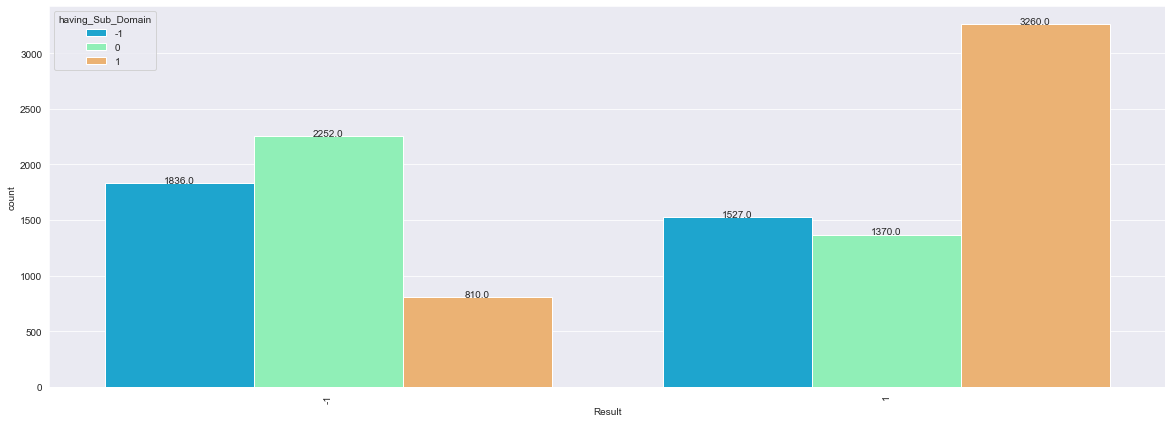

In [36]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="having_Sub_Domain",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

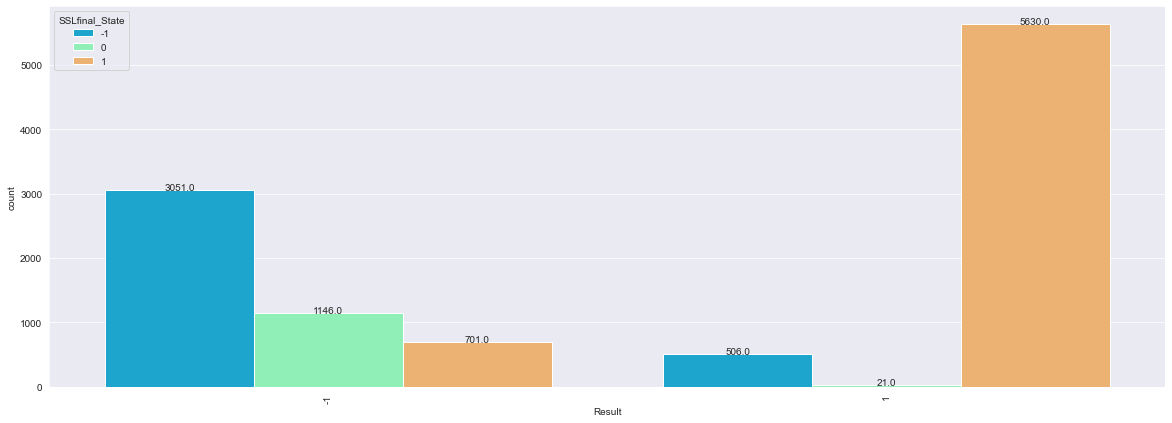

In [37]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="SSLfinal_State",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

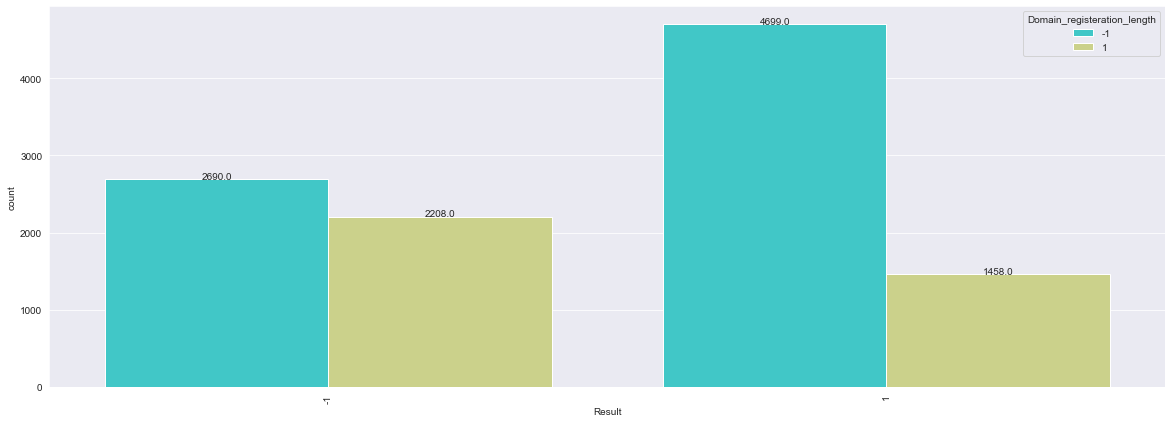

In [38]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Domain_registeration_length",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

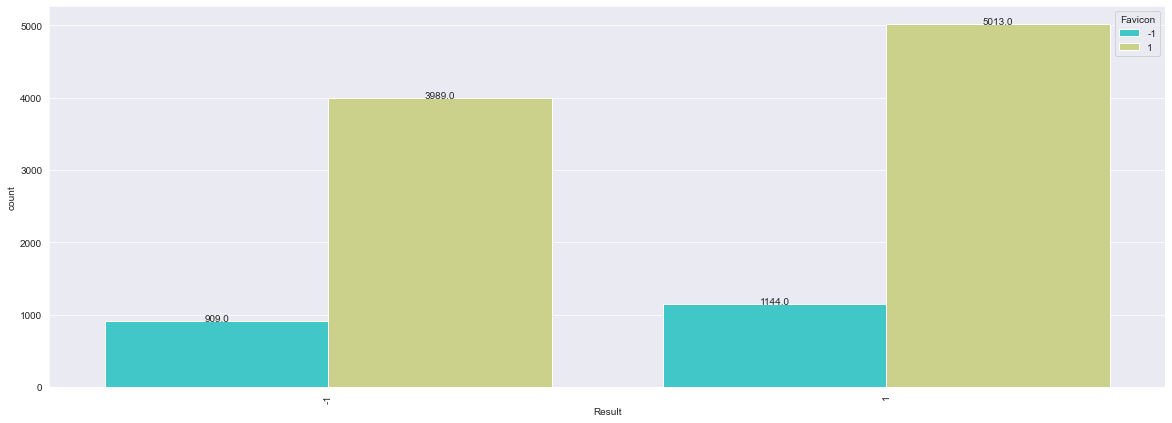

In [39]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Favicon",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

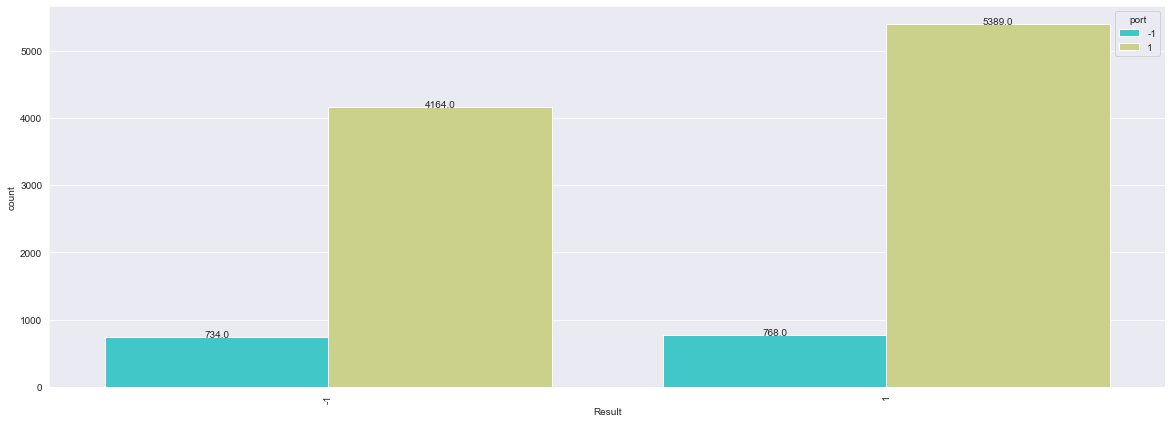

In [40]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="port",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

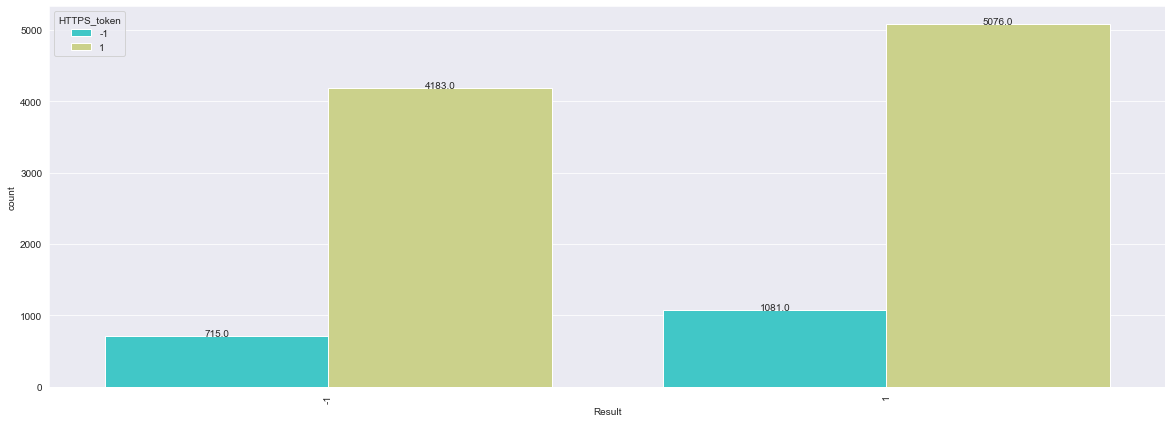

In [41]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="HTTPS_token",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

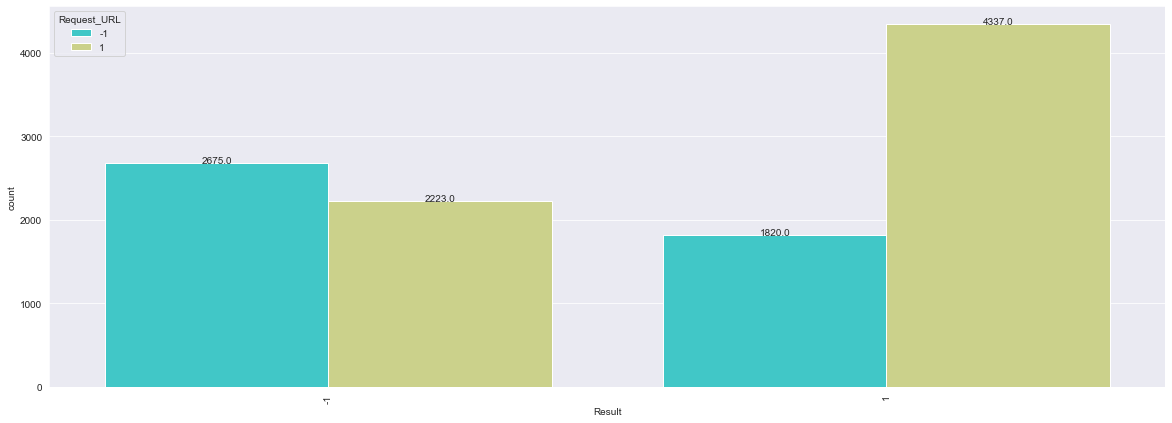

In [42]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Request_URL",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

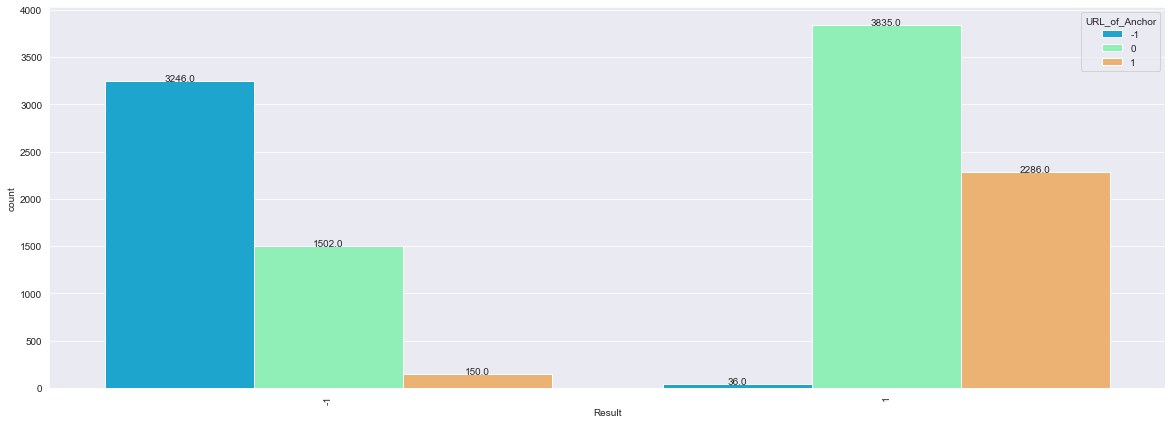

In [43]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="URL_of_Anchor",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

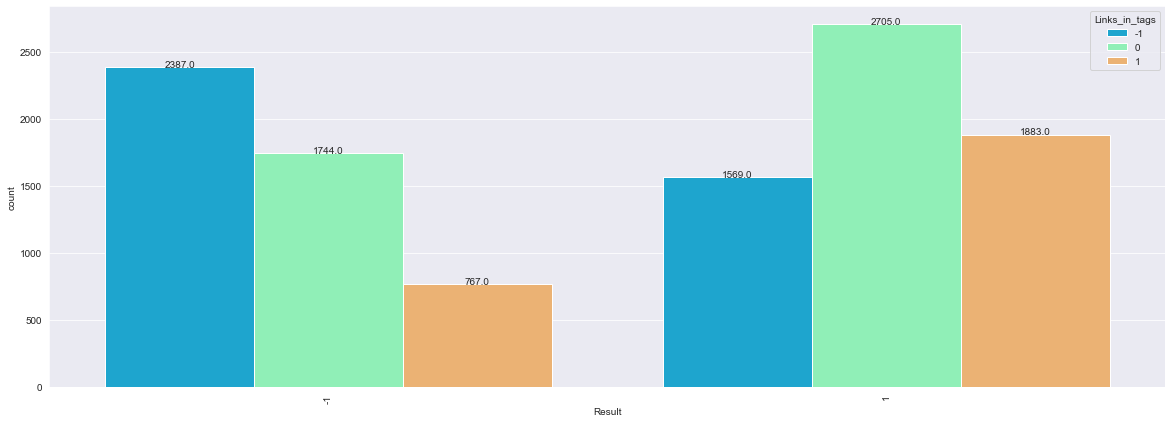

In [44]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Links_in_tags",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

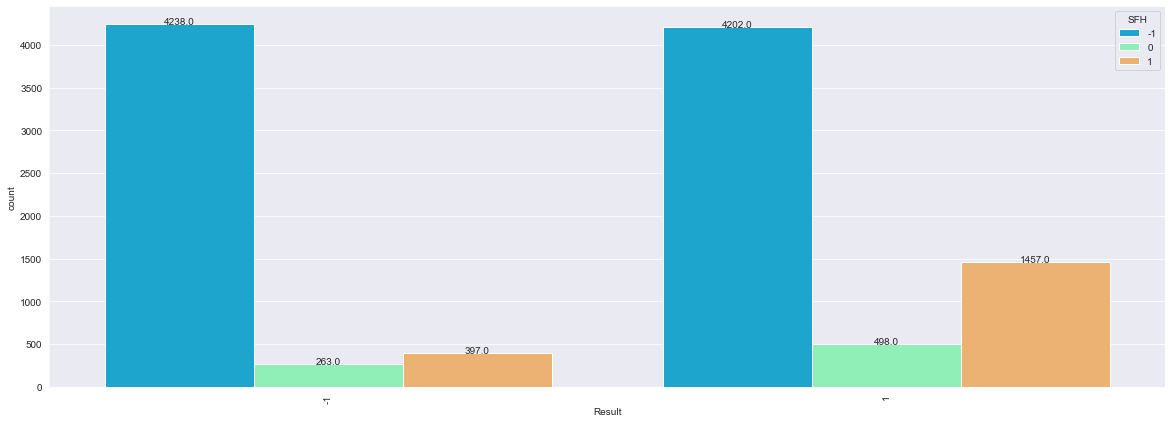

In [45]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="SFH",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

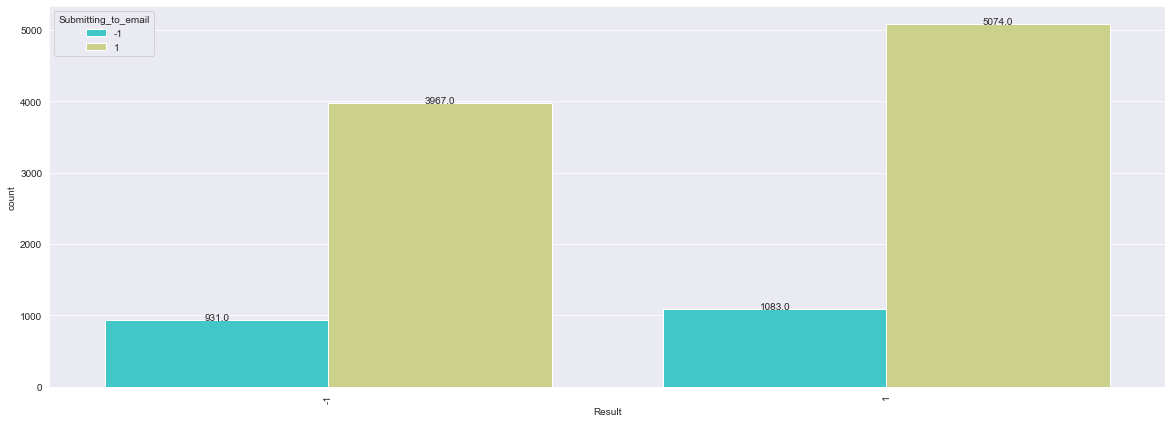

In [46]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Submitting_to_email",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

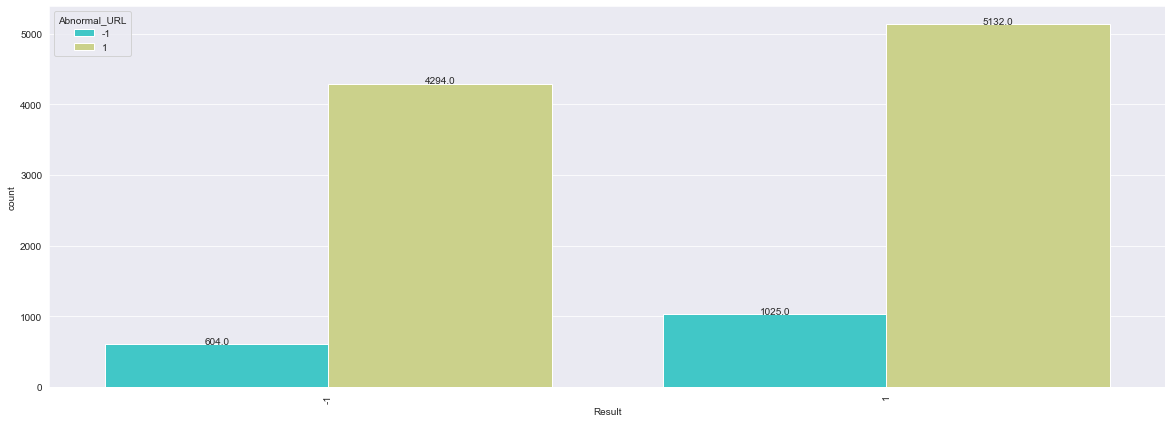

In [47]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Abnormal_URL",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

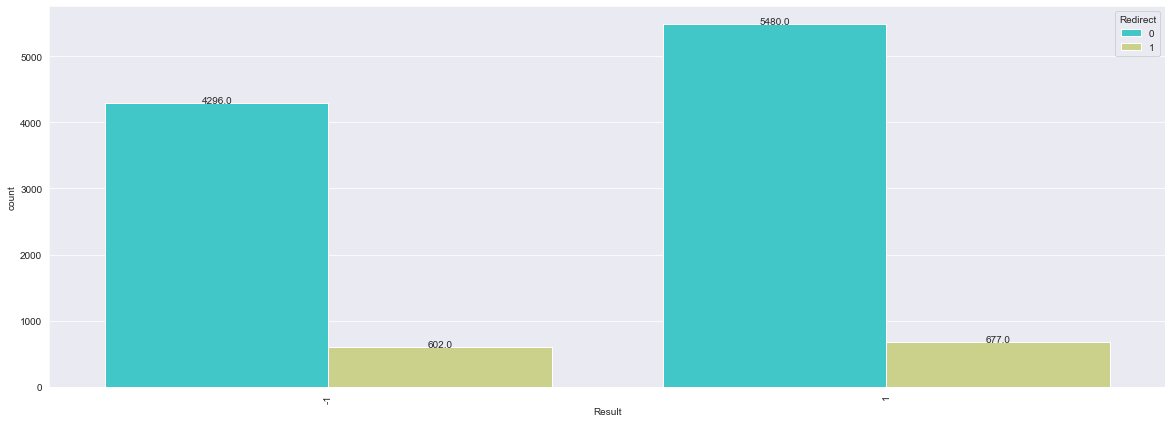

In [48]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Redirect",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

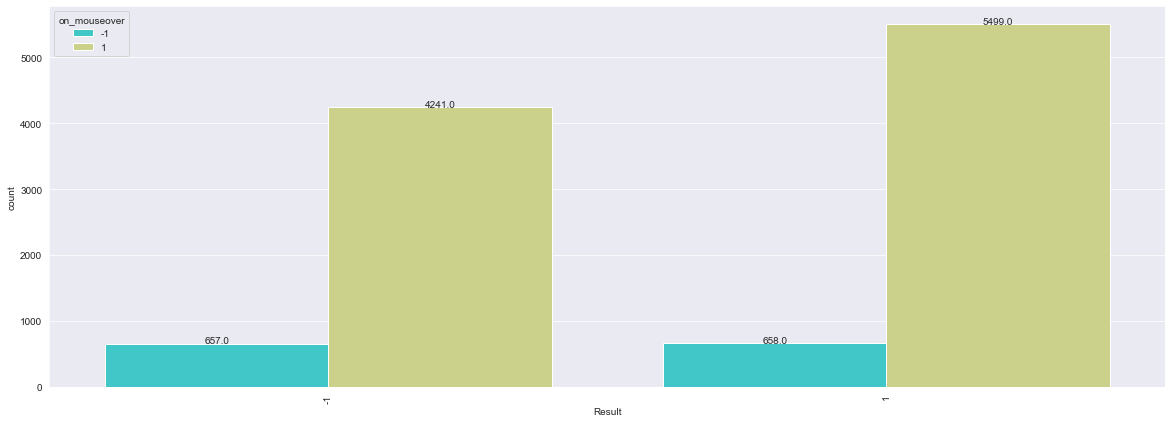

In [49]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="on_mouseover",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

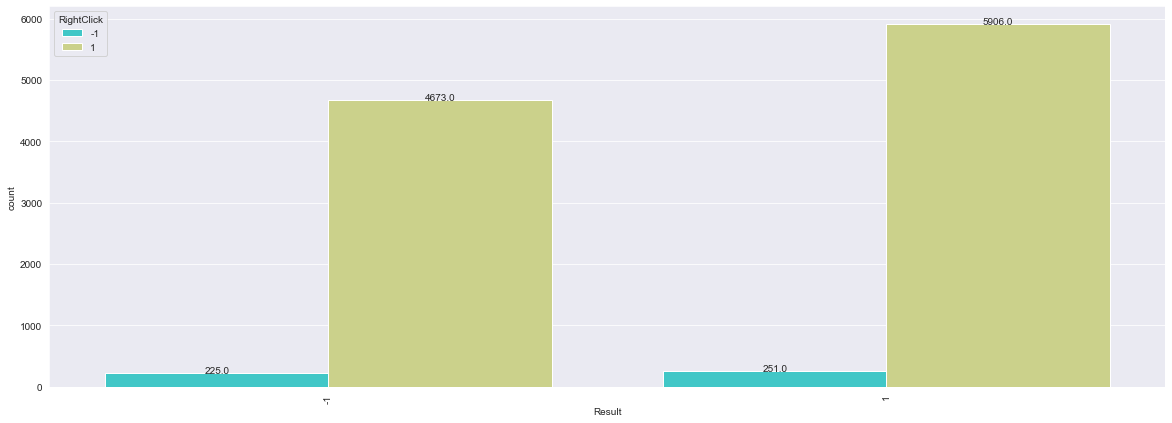

In [50]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="RightClick",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

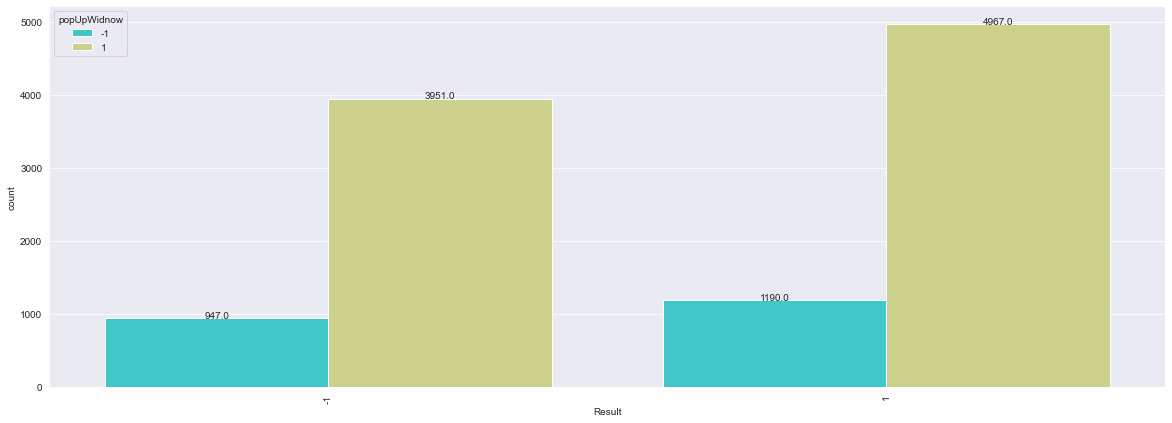

In [51]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="popUpWidnow",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

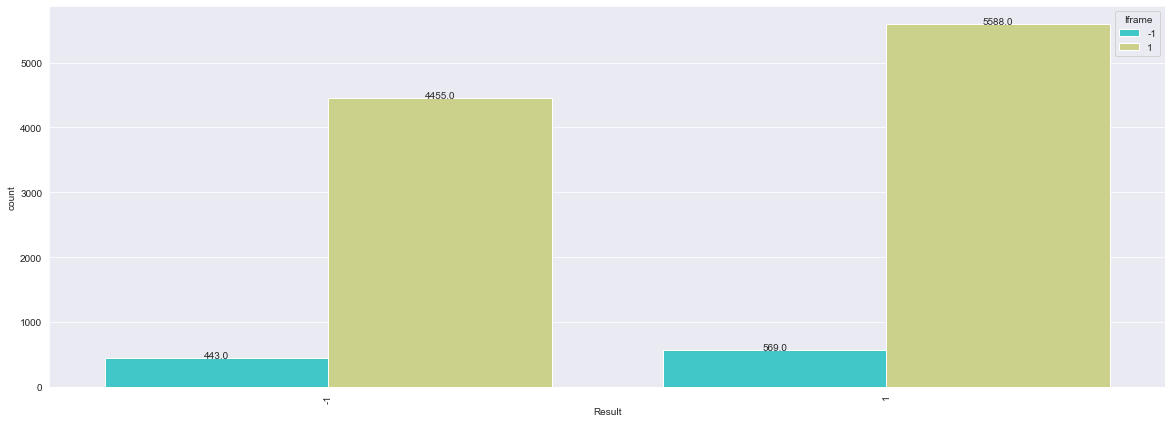

In [52]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Iframe",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

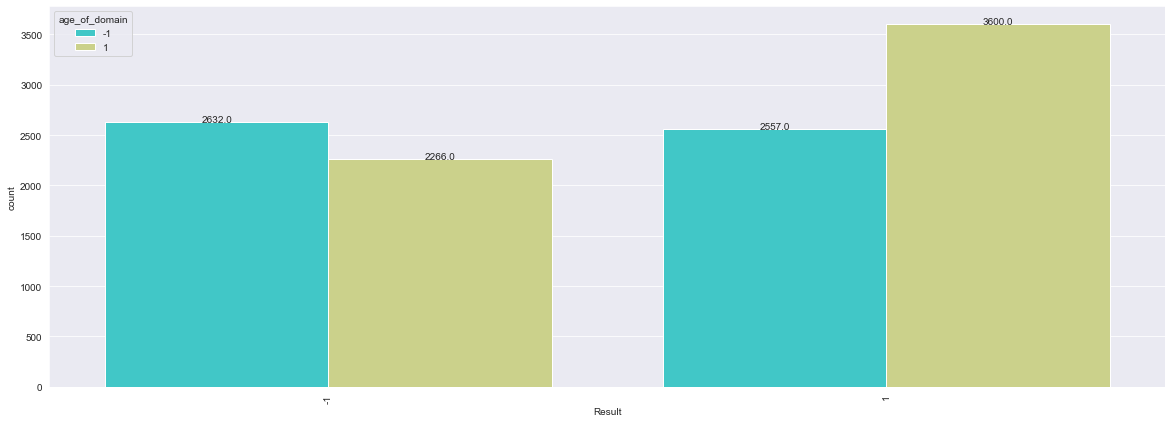

In [53]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="age_of_domain",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

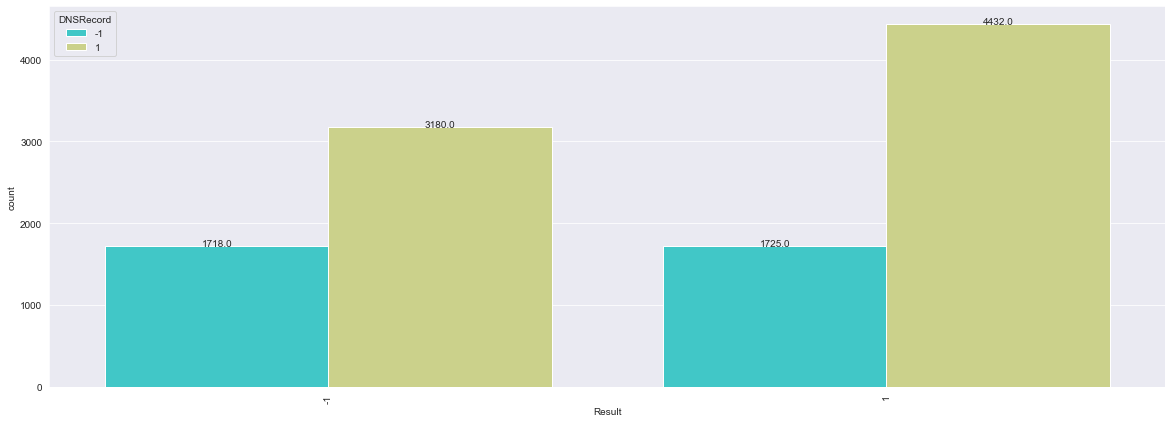

In [54]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="DNSRecord",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

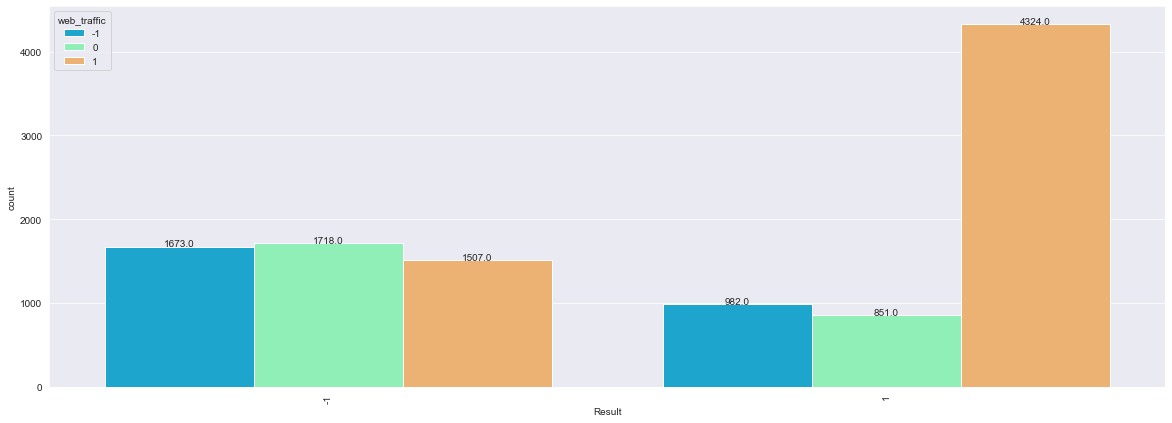

In [55]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="web_traffic",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

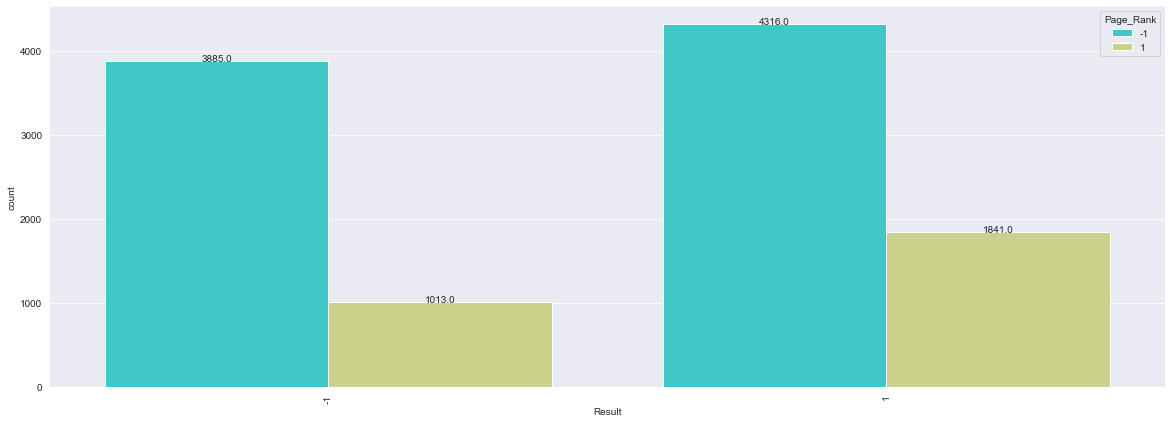

In [56]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Page_Rank",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

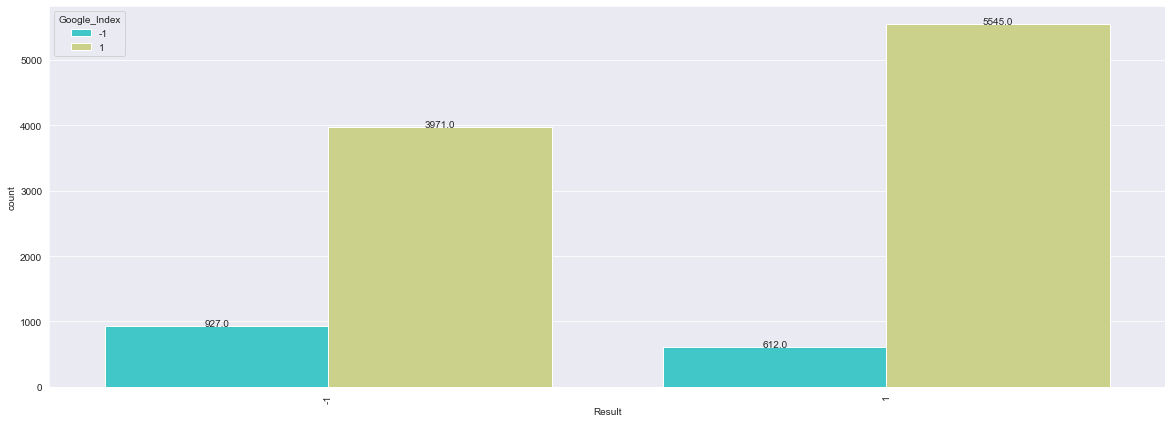

In [57]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Google_Index",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

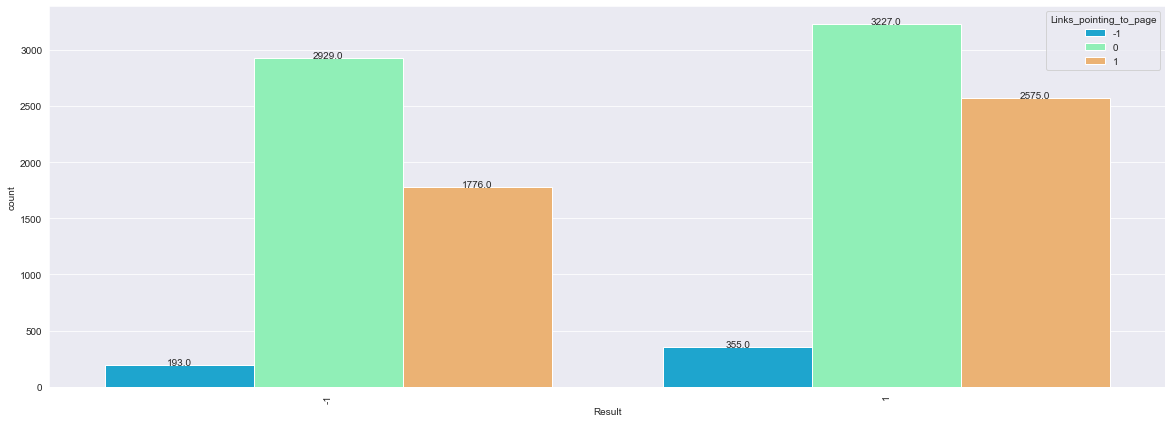

In [58]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Links_pointing_to_page",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

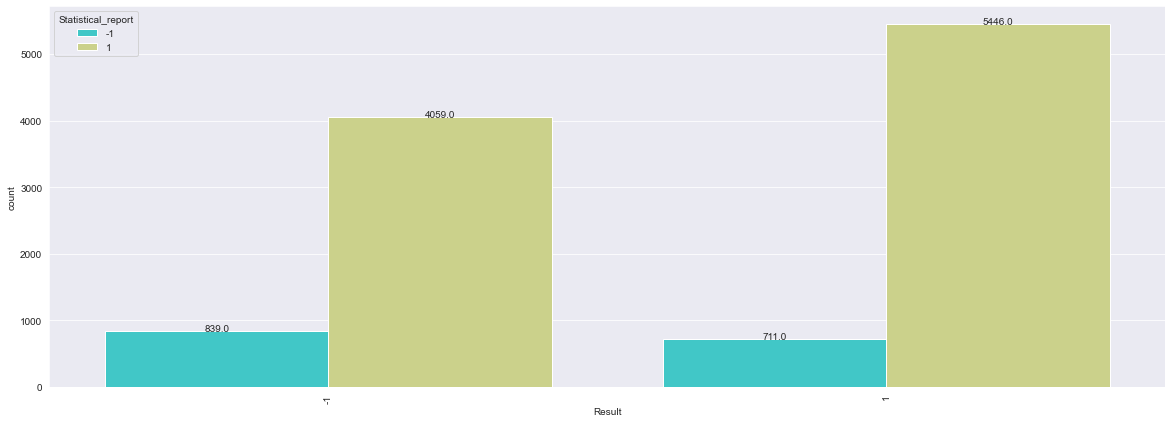

In [59]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,data=df_train,x = "Result",hue="Statistical_report",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### Multivariate Analysis
We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process. 

###### No need to perform since each feature is an independent feature and are not inter related

## Data Cleaning
1. Handling Duplicate Data

In [60]:
df = df_train

In [61]:
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [62]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
df.duplicated(keep=False)

0         True
1         True
2         True
3         True
4         True
         ...  
11050     True
11051     True
11052     True
11053     True
11054    False
Length: 11055, dtype: bool

In [63]:
df.duplicated(keep=False).sum()

7843

In [64]:
df.duplicated().sum()
# keep = First

5206

In [65]:
# print the duplicate dataset
df.loc[df.duplicated(keep=False)]

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1


In [66]:
# keep : {'first', 'last', False}, default 'first'
# Drop duplicates except for the first occurrence.
df1 = df.drop_duplicates(keep='first')
df1

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [67]:
# removes all duplicate rows
df2 = df.drop_duplicates(keep=False) # False --Drop all duplicates.
df2

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
91,-1,-1,-1,1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
107,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,-1,1,-1,-1,1,0,1,-1
129,1,-1,1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,0,1,-1
132,1,-1,1,1,-1,-1,1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
168,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,-1,1,0,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [68]:
# Drop duplicates except for the last occurrence.
df3 = df.drop_duplicates(keep="last")
df3

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
91,-1,-1,-1,1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
107,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,-1,1,-1,-1,1,0,1,-1
129,1,-1,1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,0,1,-1
132,1,-1,1,1,-1,-1,1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
168,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,-1,1,0,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [69]:
# Drop duplicates except for the last occurrence.
df3 = df.drop_duplicates(keep="last")
df3

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
91,-1,-1,-1,1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
107,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,-1,1,-1,-1,1,0,1,-1
129,1,-1,1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,0,1,-1
132,1,-1,1,1,-1,-1,1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
168,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,-1,1,0,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [70]:
df.drop_duplicates(keep="first")
# inplace = False 

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [71]:
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [72]:
# changing the dataset by settig inplace  to true
df.drop_duplicates(keep='first', inplace=True)
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


### Check Duplicate Value in the dataset
You have a dataset and have to check there is duplicates or not. 
The Python pandas library has a method for it, that is duplicated(). It checks for the duplicates rows and returns 
True and False.The code is the following

In [73]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11037    False
11045    False
11048    False
11049    False
11054    False
Length: 5849, dtype: bool

In [74]:
df.duplicated().sum()

0

In [75]:
df.shape

(5849, 31)

In [76]:
df.loc[df.duplicated(keep="first")]

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [77]:
# removes duplicate rows based on all columns.default keep = 'first'
df.drop_duplicates(inplace=True,keep = 'first')

In [78]:
df.shape

(5849, 31)

##### 2. Handling missing value 

In [79]:
df_train.isnull()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
df_train

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


<AxesSubplot: >

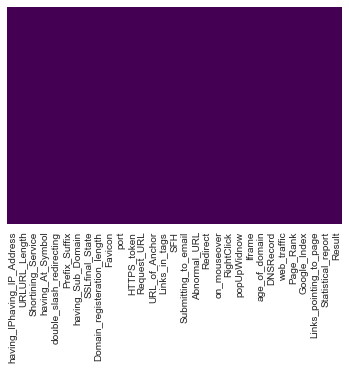

In [81]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False, cmap="viridis")
# From the below graph it is cleary visible that we dont have null values

In [82]:
# lets find out the percentage of misssing vale in each column
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
having_IPhaving_IP_Address,having_IPhaving_IP_Address,0.0
URLURL_Length,URLURL_Length,0.0
Shortining_Service,Shortining_Service,0.0
having_At_Symbol,having_At_Symbol,0.0
double_slash_redirecting,double_slash_redirecting,0.0
Prefix_Suffix,Prefix_Suffix,0.0
having_Sub_Domain,having_Sub_Domain,0.0
SSLfinal_State,SSLfinal_State,0.0
Domain_registeration_length,Domain_registeration_length,0.0
Favicon,Favicon,0.0


# FEATURE SELECTION TECHNIQUES

### FEATURE SELECTION USING VARIANCE THRESHOLD :-

In [83]:
#taking only the features
phishlegVt = df.drop(['Result'] ,axis=1)

In [84]:
phishlegVt.head(10)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


In [85]:
phishleg_var = phishlegVt.var()     #calculating variance
phishleg_var = phishlegVt.var().to_frame() #convert series to dataframe
phishleg_var = phishleg_var.rename(columns={0:"Variance"})
phishleg_var

,Variance
having_IPhaving_IP_Address,0.982521
URLURL_Length,0.604231
Shortining_Service,0.481259
having_At_Symbol,0.653606
double_slash_redirecting,0.484211
Prefix_Suffix,0.422015
having_Sub_Domain,0.643922
SSLfinal_State,0.854651
Domain_registeration_length,0.906602
Favicon,0.661612


In [86]:
phishleg_var.shape

(30, 1)

In [87]:
#select those columns whose variance is greater than or equal to 1
#variance threshold = 1%
phishleg_var1 = phishlegVt.loc[:,phishlegVt.var() >= 0.01]
phishleg_var1.head(10)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


In [88]:
#using sklearn library 
selector = VarianceThreshold(threshold=0.01) #variance=1%
#fit the object to the data
selector.fit(phishlegVt)

VarianceThreshold(threshold=0.01)

In [89]:
#get features having variance > the set threshold value = 0.01
selector.get_support(indices=False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [90]:
phishlegVt.columns[selector.get_support()]

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [91]:
#eliminating features having variance < the set threshold value using list comprehension
selected_cols = [column for column in phishlegVt.columns if column not in phishlegVt.columns[selector.get_support()]]
selected_cols

[]

In [92]:
phishlegVt2 = phishlegVt.drop(labels=selected_cols,axis=1)
phishlegVt2.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [93]:
#alternative method of directly eliminating features having 
#variance < the set threshold value using list comprehension
phishlegVt_op = selector.transform(phishlegVt)
phishlegVt_op

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [94]:
#to remove constant features
phishlegVt_df = df
X_s = phishlegVt_df.iloc[:,0:-1]
Y_s = phishlegVt_df['Result']

In [95]:
phishlegVt_df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [96]:
X_s

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,0,-1,1,0,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,0,-1,1,0,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,1,-1,1,1,-1,1,1,1


In [97]:
Y_s

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11037   -1
11045    1
11048    1
11049   -1
11054   -1
Name: Result, Length: 5849, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, Y_s,test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((4094, 30), (1755, 30))

In [99]:
#appling variancethreshold
constant_selector = VarianceThreshold(threshold=0)
constant_selector.fit(X_train)
#after this we can use alternative method

VarianceThreshold(threshold=0)

In [100]:
#get features having variance > the set threshold value = 0.0
sum(constant_selector.get_support())

30

In [101]:
#above we got no of features which are not constant
#find the no of constant features with the help of following script: 
constantselected_cols = [column for column in X_train.columns if column not in X_train.columns[constant_selector.get_support()]]
len(constantselected_cols)

0

In [102]:
#lets drop those columns from the data set where variance is zero
X_train_op = X_train.drop(labels=constantselected_cols,axis=1)
X_train_op.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
8310,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,-1,1,0,1
8922,1,-1,1,1,1,-1,1,-1,1,1,...,1,1,1,-1,1,0,-1,1,0,1
1239,1,1,-1,1,1,-1,1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,-1,0,-1
157,1,-1,1,1,1,-1,0,0,-1,1,...,1,1,1,1,-1,-1,-1,1,-1,1
2248,1,-1,1,1,1,-1,0,1,1,-1,...,1,-1,-1,-1,-1,1,-1,1,1,-1


In [103]:
#alternative method  ---lets drop those columns from the data set where variance is zero 
X_train_ac = constant_selector.transform(X_train)
X_test_ac = constant_selector.transform(X_test)
X_train_ac.shape, X_test_ac.shape 

((4094, 30), (1755, 30))

In [104]:
#Removing the quasi constant columns
quasiconstant_selector = VarianceThreshold(threshold=0.01)
quasiconstant_selector.fit(X_train)

VarianceThreshold(threshold=0.01)

In [105]:
X_s.shape, Y_s.shape

((5849, 30), (5849,))

In [106]:
#features having variance greater than 
#the set threshold value = 0.01(not quasi constant)
sum(quasiconstant_selector.get_support())

30

In [107]:
#filter out the quasi constant features(threshold < = 1%
quasi_cols = [column for column in X_train.columns if column not in X_train.columns[quasiconstant_selector.get_support()]]
len(quasi_cols)  #check the quasi constant columns count

0

In [108]:
print("Total features : ", len(X_train.columns))
print("Total constant features : ", len(constantselected_cols))
print("Total non-quasi constant features : ", len(X_train.columns)-len(quasi_cols))   

Total features :  30
Total constant features :  0
Total non-quasi constant features :  30


In [109]:
frame = X_train.var().to_frame()

In [110]:
frame = frame.rename(columns={0:"Variance"})

In [111]:
print("Total features : ", sum(frame.Variance.values>=0))
print("Total constant features : ", sum(frame.Variance.values==0))
print("Total non-constant and non-quasi constant features : ", sum(frame.Variance.values>0.01))  

Total features :  30
Total constant features :  0
Total non-constant and non-quasi constant features :  30


In [112]:
#lets transfer the train and test data using fit selector
X_train_aq = quasiconstant_selector.transform(X_train)
X_test_aq = quasiconstant_selector.transform(X_test)
X_train_aq.shape, X_test_aq.shape 

((4094, 30), (1755, 30))

### REMOVE THE DUPLICATE FEATURES

In [113]:
df = pd.DataFrame(df)
#pd.DataFrame(df)

In [114]:
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [115]:
df.head(10)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [116]:
df.shape

(5849, 31)

In [117]:
# TRANSPOSE Row to Column and Column to Row
df_t = df.T
df_t

,0,1,2,3,4,5,6,7,8,9,...,11018,11019,11021,11029,11032,11037,11045,11048,11049,11054
having_IPhaving_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,-1,-1,1,1,-1,1,1,1,-1,-1
URLURL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,-1,1,1,-1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,0,-1,-1,1,0,-1,1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,1,0,-1,-1,0,-1,-1,1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,1,-1,-1,-1,1,-1,-1,1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,-1,1,1,1,1,1,1,1


In [118]:
df_t.shape

(31, 5849)

In [119]:
# Print the duplicate features
print("Duplicate Features") 
print(df_t.duplicated(keep = 'first')) # keep : {'first', 'last', False}, default 'first'
duplicate_feat = df_t.duplicated().sum()
print("Count of duplicate_feature :",duplicate_feat)

Duplicate Features
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank          

In [120]:
# Print the duplicate features Names only
duplicate_features = df_t[df_t.duplicated()].index.values
print("duplicate_features: ",duplicate_features)

duplicate_features:  []


In [121]:
# Import the Dataset
df_sant = df

In [122]:
# Lets remove the Target Variable
df_sant = df_sant.iloc[:,:-1]

In [123]:
df_sant.head(1)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1


In [124]:
df_sant_t = df_sant.T
df_sant_t.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11018,11019,11021,11029,11032,11037,11045,11048,11049,11054
having_IPhaving_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,-1,-1,1,1,-1,1,1,1,-1,-1
URLURL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1


In [125]:
df_sant_t.shape

(30, 5849)

In [126]:
duplicate_feat_count = df_sant_t.duplicated().sum()
print("Duplicate Features Count :",duplicate_feat_count)

Duplicate Features Count : 0


In [127]:
# remove duplicate features
duplicate_features = df_sant_t[df_sant_t.duplicated()].index.values
df_sant_new = df_sant.drop(columns=duplicate_features,axis=1)

In [128]:
len(df_sant.columns),len(df_sant_new.columns)

(30, 30)

# ANOVA_or_F-Test

In [129]:
df_cancer = df

In [130]:
df_cancer.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [131]:
df_cancer.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [132]:
y = df_cancer["Result"] # Target
X = df_cancer.drop(labels=["Result"],axis=1) # Features

In [133]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5849, 30)
(5849,)


In [134]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [135]:
"""
f_regression()
Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors.
This is a scoring function to be used in a feature selection procedure, not
a free standing feature selection procedure.

This is done in 2 steps:

1. The correlation between each regressor and the target is computed,
   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
   std(y)).
2. It is converted to an F score then to a p-value.
"""

'\nf_regression()\nUnivariate linear regression tests.\n\nLinear model for testing the individual effect of each of many regressors.\nThis is a scoring function to be used in a feature selection procedure, not\na free standing feature selection procedure.\n\nThis is done in 2 steps:\n\n1. The correlation between each regressor and the target is computed,\n   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *\n   std(y)).\n2. It is converted to an F score then to a p-value.\n'

In [136]:
# apply SelectKBest class to extract top 16 best features
fs = SelectKBest(score_func=f_regression,k=16) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X,y)

In [137]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))

[0.000e+00 0.000e+00 0.000e+00 7.900e-03 5.000e-03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.160e-02 2.775e-01 1.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.400e-01 0.000e+00 4.200e-03 3.281e-01 4.777e-01
 8.590e-02 3.687e-01 0.000e+00 1.110e-02 0.000e+00 2.000e-04 0.000e+00
 0.000e+00 0.000e+00]
[6.512200e+01 1.989200e+01 3.411800e+01 7.072000e+00 7.883000e+00
 9.937040e+02 5.623760e+02 5.409474e+03 2.934910e+02 3.792000e+00
 1.179000e+00 1.549600e+01 3.503910e+02 5.005110e+03 3.697040e+02
 5.017730e+02 3.760000e-01 4.779400e+01 8.217000e+00 9.570000e-01
 5.040000e-01 2.950000e+00 8.080000e-01 2.315100e+01 6.453000e+00
 5.040180e+02 1.358200e+01 8.287200e+01 2.753500e+01 6.963400e+01]


In [138]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nlargest(30,columns="F_Score"))

                 Input_Features      F_Score  P_Value
7                SSLfinal_State  5409.473703   0.0000
13                URL_of_Anchor  5005.109761   0.0000
5                 Prefix_Suffix   993.703780   0.0000
6             having_Sub_Domain   562.376190   0.0000
25                  web_traffic   504.018152   0.0000
15                          SFH   501.773262   0.0000
14                Links_in_tags   369.703923   0.0000
12                  Request_URL   350.390596   0.0000
8   Domain_registeration_length   293.491486   0.0000
27                 Google_Index    82.871957   0.0000
29           Statistical_report    69.633556   0.0000
0    having_IPhaving_IP_Address    65.121881   0.0000
17                 Abnormal_URL    47.793775   0.0000
2            Shortining_Service    34.117857   0.0000
28       Links_pointing_to_page    27.535091   0.0000
23                age_of_domain    23.150634   0.0000
1                 URLURL_Length    19.891570   0.0000
11                  HTTPS_to

In [139]:
#Load the dataset 
df_loan = df

In [140]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   5849 non-null   int64
 1   URLURL_Length                5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   in

In [141]:
df_loan.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [142]:
df_loan.reset_index(drop=True,inplace=True)

In [143]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])
'''

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ncols = df_loan.columns.tolist()\nfor column in cols:\n    if df_loan[column].dtype == 'object':\n        df_loan[column] = le.fit_transform(df_loan[column])\n"

In [144]:
# encode the Categorical Variable
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [145]:
cat_cols = df_loan.select_dtypes(include=["object"]).columns
cat_cols

Index([], dtype='object')

In [146]:
df_loan = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df_loan)

In [147]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   5849 non-null   int64
 1   URLURL_Length                5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int

In [148]:
X = df_loan.iloc[:,0:-1]
X.head(1)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1


In [149]:
y = df_loan["Result"]

In [150]:
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [151]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=5)

In [152]:
# Apply feature selection
fs.fit(X,y)

SelectKBest(k=5)

In [153]:
# True = Top 5 columns as we mentioned k =5
# False = Allthe remaining columns excpet k =5
fs.get_support()

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False])

In [154]:
fs.get_support().sum()

5

In [155]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [156]:
print("P_Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)

P_Values :
[0.000e+00 0.000e+00 0.000e+00 7.900e-03 5.000e-03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.160e-02 2.775e-01 1.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.400e-01 0.000e+00 4.200e-03 3.281e-01 4.777e-01
 8.590e-02 3.687e-01 0.000e+00 1.110e-02 0.000e+00 2.000e-04 0.000e+00
 0.000e+00 0.000e+00]
F Values :
[6.51218811e+01 1.98915700e+01 3.41178567e+01 7.07197919e+00
 7.88297262e+00 9.93703780e+02 5.62376190e+02 5.40947370e+03
 2.93491486e+02 3.79158361e+00 1.17936977e+00 1.54958606e+01
 3.50390596e+02 5.00510976e+03 3.69703923e+02 5.01773262e+02
 3.75536464e-01 4.77937749e+01 8.21727694e+00 9.56649146e-01
 5.04218845e-01 2.94976662e+00 8.08136488e-01 2.31506341e+01
 6.45334801e+00 5.04018152e+02 1.35815164e+01 8.28719573e+01
 2.75350910e+01 6.96335563e+01]


In [157]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(5,columns="Score"))

       Input_Features        Score  P_Value
7      SSLfinal_State  5409.473703      0.0
13      URL_of_Anchor  5005.109761      0.0
5       Prefix_Suffix   993.703780      0.0
6   having_Sub_Domain   562.376190      0.0
25        web_traffic   504.018152      0.0


# Machine Learning Algorithm

In [202]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome 
#import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [203]:
df1 = df
pd.DataFrame(df1)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
5845,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
5846,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
5847,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


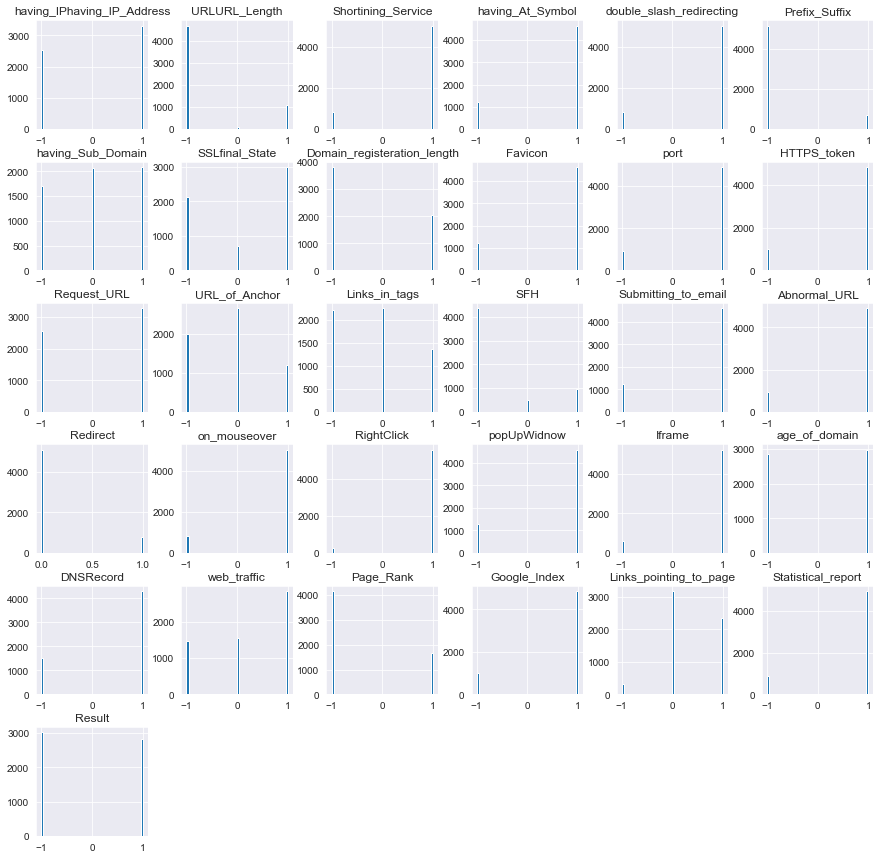

In [204]:
df1.hist(bins = 50,figsize = (15,15))
plt.show()

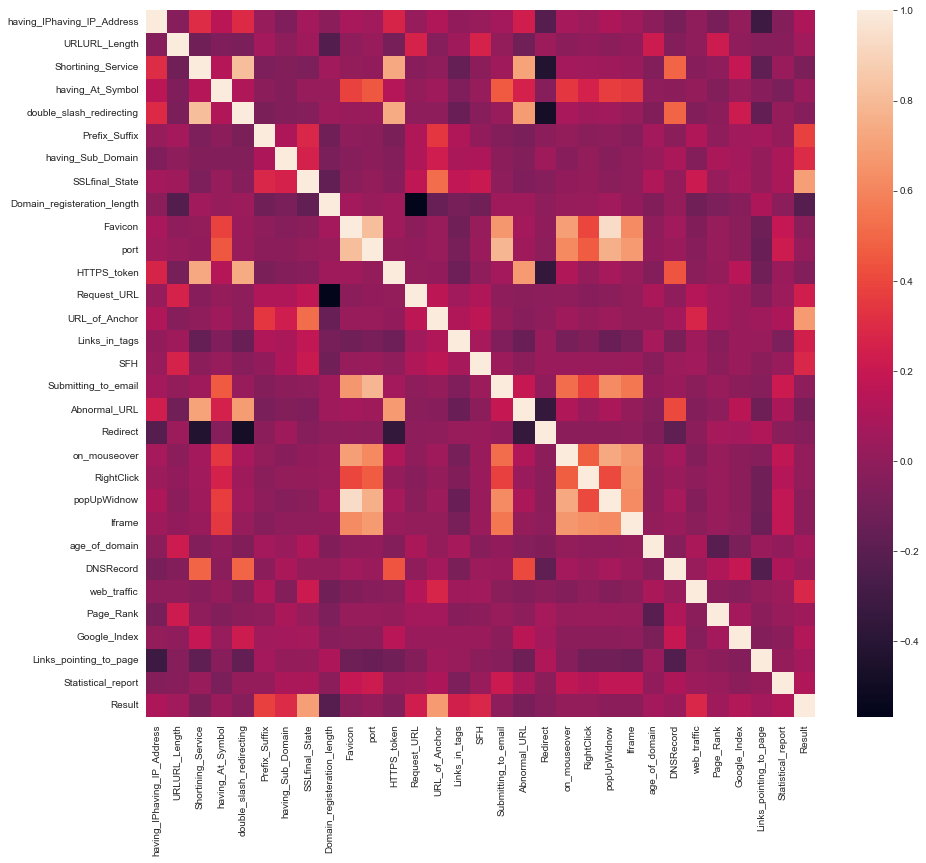

In [205]:
plt.figure(figsize=(15,13))
sns.heatmap(df1.corr())
plt.show()

In [246]:
#shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = df1
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,1,1,-1,1,0,-1,1,...,1,1,1,1,-1,-1,1,0,1,-1
1,1,1,1,1,1,-1,-1,0,-1,1,...,1,1,1,1,1,1,-1,0,1,-1
2,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,1,1,-1
3,-1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,1,1,-1,-1,0,1,-1
4,-1,-1,1,-1,1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,1,1,1,1,1


In [247]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((5849, 30), (5849,))

In [248]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((4679, 30), (1170, 30))

In [249]:
#importing packages
from sklearn.metrics import accuracy_score

In [250]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

# Decision Tree model 

In [251]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [252]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [253]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.912
Decision Tree: Accuracy on test Data: 0.928


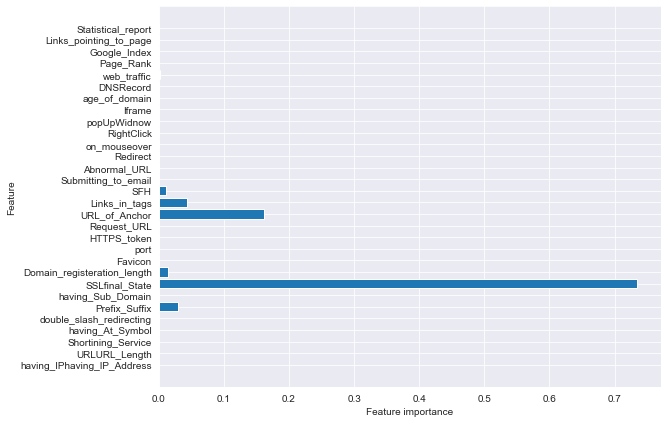

In [254]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [255]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [256]:
Scores_ml = {}
Scores_ml['Decision Tree'] = np.round(tree.score(X_test,y_test),2)

Training Accuracy : 0.9123744389826887
Testing Accuracy : 0.9282051282051282

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.98      0.93       553
        Good       0.98      0.88      0.93       617

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170


CONFUSION MATRIX


<AxesSubplot: >

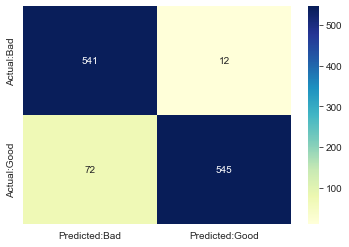

In [257]:
print('Training Accuracy :',tree.score(X_train,y_train))
print('Testing Accuracy :',tree.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(tree.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(tree.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# Random Forest model

In [258]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [259]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [260]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.920
Random forest: Accuracy on test Data: 0.938


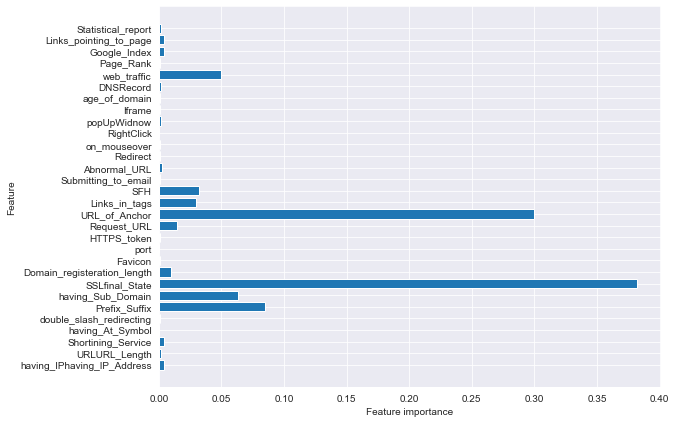

In [261]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [262]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [263]:
Scores_ml = {}
Scores_ml['Random Forest'] = np.round(forest.score(X_test,y_test),2)

Training Accuracy : 0.9198546698012395
Testing Accuracy : 0.9384615384615385

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.95      0.94       597
        Good       0.95      0.92      0.94       573

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170


CONFUSION MATRIX


<AxesSubplot: >

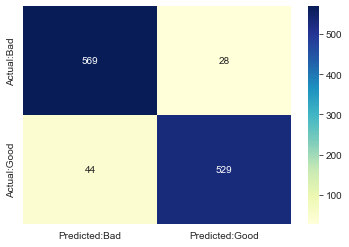

In [264]:
print('Training Accuracy :',forest.score(X_train,y_train))
print('Testing Accuracy :',forest.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(forest.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# Support vector machine model

In [265]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [266]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [267]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.919
SVM : Accuracy on test Data: 0.943


In [268]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [269]:
Scores_ml = {}
Scores_ml['SVM'] = np.round(svm.score(X_test,y_test),2)

Training Accuracy : 0.9189997862791195
Testing Accuracy : 0.9427350427350427

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.96      0.94       594
        Good       0.96      0.93      0.94       576

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170


CONFUSION MATRIX


<AxesSubplot: >

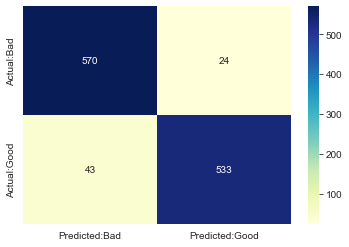

In [270]:
print('Training Accuracy :',svm.score(X_train,y_train))
print('Testing Accuracy :',svm.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(svm.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(svm.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

 # LogisticRegression
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [271]:
# create lr object
lr = LogisticRegression()

In [272]:
lr.fit(X_train,y_train)

LogisticRegression()

In [273]:
lr.score(X_test,y_test)

0.9376068376068376

In [274]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [275]:
#computing the accuracy of the model performance
acc_train_lr = accuracy_score(y_train,y_train_lr)
acc_test_lr = accuracy_score(y_test,y_test_lr)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_lr))

Logistic Regression : Accuracy on training Data: 0.917
Logistic Regression : Accuracy on test Data: 0.938


In [276]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('lr', acc_train_lr, acc_test_lr)

In [277]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(X_test,y_test),2)

Training Accuracy : 0.9170762983543492
Testing Accuracy : 0.9376068376068376

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.95      0.94       600
        Good       0.95      0.92      0.94       570

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170


CONFUSION MATRIX


<AxesSubplot: >

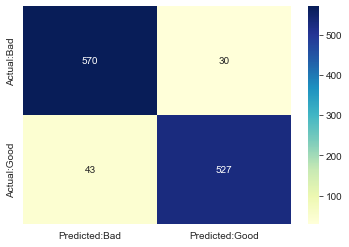

In [278]:
print('Training Accuracy :',lr.score(X_train,y_train))
print('Testing Accuracy :',lr.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# RESULTS

In [279]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.912,0.928
1,Random Forest,0.920,0.938
2,SVM,0.919,0.943
3,lr,0.917,0.938


In [280]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,SVM,0.919,0.943
1,Random Forest,0.920,0.938
3,lr,0.917,0.938
0,Decision Tree,0.912,0.928


In [281]:
# save XGBoost model to file
import pickle
pickle.dump(forest, open("SVM.pkl", "wb"))

In [282]:
# load model from file
loaded_model = pickle.load(open("SVM.pkl", "rb"))

In [283]:
result = loaded_model.score(X_train, y_train)
print(result)

0.9198546698012395


In [284]:
'''* Phishing links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Legitimate links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html
'''

'* Phishing links => this are phishing sites\nyeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php\nfazan-pacir.rs/temp/libraries/ipad\nwww.tubemoviez.exe\nsvision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt\n\n* Legitimate links => this are not phishing sites\nwww.youtube.com/\nyoutube.com/watch?v=qI0TQJI3vdU\nwww.retailhellunderground.com/\nrestorevisioncenters.com/html/technology.html\n'

In [285]:
predict_phish = [[-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1]]
predict_legitimate = [[1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1]]
loaded_model = pickle.load(open('SVM.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_phish)
result2 = loaded_model.predict(predict_legitimate)
print(result)
if(result==1):
    print("THIS WEBSITE IS A LEGITIMATE WEBSITE.")
else:
    print("THIS WEBSITE IS A PHISHING WEBSITE.")
print("*"*30)
print(result2)
if (result2 ==1):
  print('THIS WEBSITE IS A LEGITIMATE WEBSITE.')
else:
  print('THIS WEBSITE IS A PHISHING WEBSITE.')

[-1]
THIS WEBSITE IS A PHISHING WEBSITE.
******************************
[1]
THIS WEBSITE IS A LEGITIMATE WEBSITE.


# ---- END ----